In [1]:
# importing the required libraries for the project
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# read file
df=pd.read_csv('breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [6]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### Data cleaning

In [7]:
# check for missing values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# check for duplicates
df.duplicated().sum()

0

# EDA

## Plotting Histograms

<AxesSubplot:title={'center':'Histogram of Radius_Mean'}, xlabel='Radius_Mean', ylabel='Frequency'>

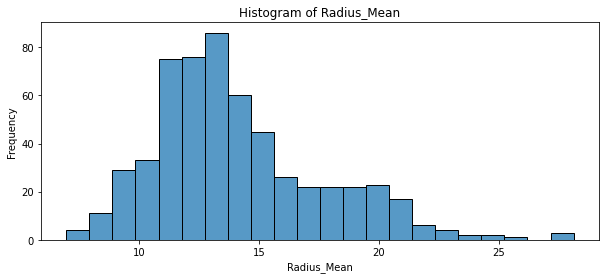

In [9]:
plt.figure(figsize=(10,4))
plt.xlabel("Radius_Mean")
plt.ylabel("Frequency")
plt.title("Histogram of Radius_Mean")
sns.histplot(df['radius_mean'])

<AxesSubplot:title={'center':'Histogram of Texture_Mean'}, xlabel='Texture_mean', ylabel='Frequency'>

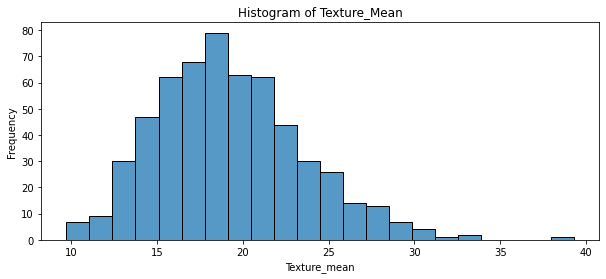

In [10]:
plt.figure(figsize=(10,4))
plt.xlabel("Texture_mean")
plt.ylabel("Frequency")
plt.title("Histogram of Texture_Mean")
sns.histplot(df['texture_mean'])

<AxesSubplot:title={'center':'Histogram of perimeter_Mean'}, xlabel='Perimeter_mean', ylabel='Frequency'>

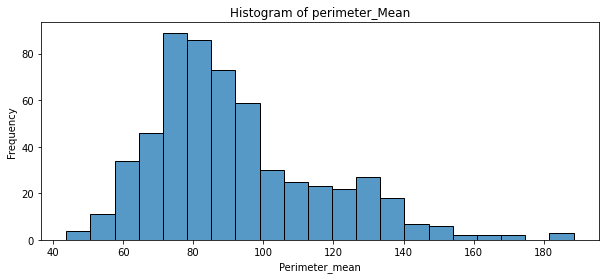

In [11]:
plt.figure(figsize=(10,4))
plt.xlabel("Perimeter_mean")
plt.ylabel("Frequency")
plt.title("Histogram of perimeter_Mean")
sns.histplot(df['perimeter_mean'])

<AxesSubplot:title={'center':'Histogram of Area_Mean'}, xlabel='Area_mean', ylabel='Frequency'>

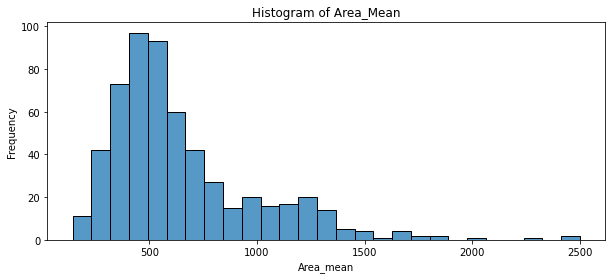

In [12]:
plt.figure(figsize=(10,4))
plt.xlabel("Area_mean")
plt.ylabel("Frequency")
plt.title("Histogram of Area_Mean")
sns.histplot(df['area_mean'])

<AxesSubplot:title={'center':'Histogram of Smoothness_Mean'}, xlabel='Smoothness_Mean', ylabel='Frequency'>

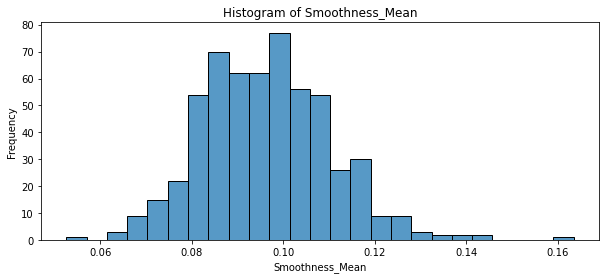

In [13]:
plt.figure(figsize=(10,4))
plt.xlabel("Smoothness_Mean")
plt.ylabel("Frequency")
plt.title("Histogram of Smoothness_Mean")
sns.histplot(df['smoothness_mean'])

###### Counting the benign and malignant tumors

In [14]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

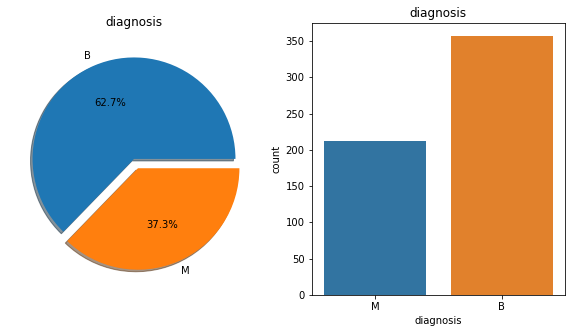

In [15]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df['diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis',data=df,ax=ax[1])
ax[1].set_title('diagnosis')
plt.show()

<AxesSubplot:xlabel='radius_mean', ylabel='count'>

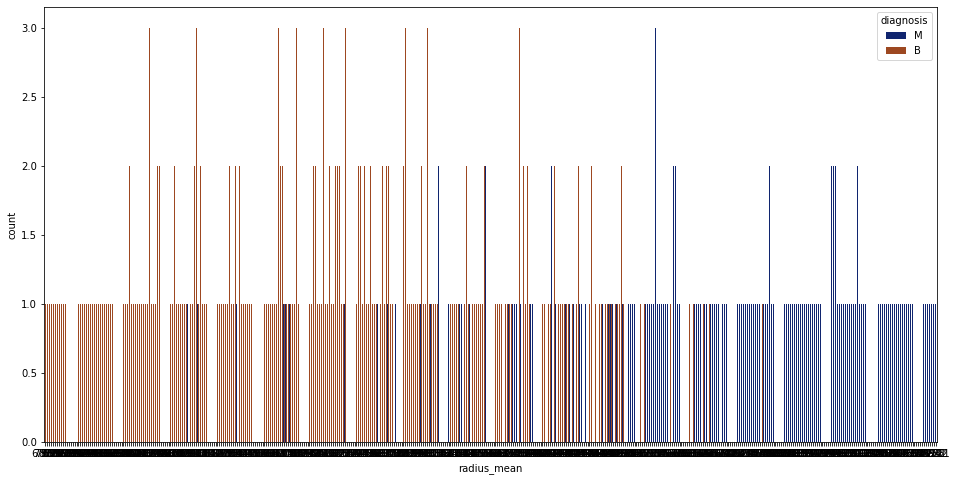

In [16]:
plt.figure(figsize=(16,8))
sns.countplot(df['radius_mean'],hue=df['diagnosis'],palette='dark')

###### calculating Tumors size

0.9423795716730992
0.8455216229065377


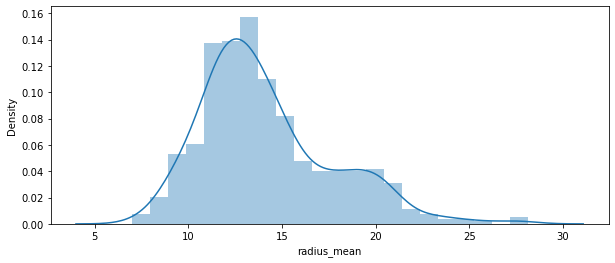

In [17]:
plt.figure(figsize=(10,4))
sns.distplot(df['radius_mean'])
print(df['radius_mean'].skew())
print(df['radius_mean'].kurt())

## Calculating outliers

While looking at the above histograms, I can see there are some rare values in benign and malignant distributions.
These values can be errors or rare events. These errors and rare events can be called outliers.
Calculating outliers:
first we need to calculate first quartile (Q1- 25%) and third quartile (Q3- 75%)
then find IQR(inter quartile range) = Q3-Q1
finally compute Q1 - 1.5IQR and Q3 + 1.5IQR
Anything outside this range is an outlier
The code for finding outliers for different features is written below.
The identified outliers can be removed or can be replaced with some other suitable value.

In [18]:
# Outliers in radius mean
df_benign = df[df["diagnosis"] == "B"]
df_malignant = df[df["diagnosis"] == "M"]
desc = df_benign.radius_mean.describe()
desc1 = df_malignant.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is Benign outlier: (", lower_bound ,",", upper_bound,")")
df_benign[df_benign.radius_mean < lower_bound].radius_mean
print("Radius_Mean benign Outliers: ",df_benign[(df_benign.radius_mean < lower_bound) | (df_benign.radius_mean > upper_bound)].radius_mean.values)

Q1 = desc1[4]
Q3 = desc1[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is Malignant outlier: (", lower_bound ,",", upper_bound,")")
df_malignant[df_malignant.radius_mean < lower_bound].radius_mean
print("Radius_Mean Malignant Outliers: ",df_malignant[(df_malignant.radius_mean < lower_bound) | (df_malignant.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is Benign outlier: ( 7.645000000000001 , 16.805 )
Radius_Mean benign Outliers:  [ 6.981 16.84  17.85 ]
Anything outside this range is Malignant outlier: ( 8.302499999999998 , 26.3625 )
Radius_Mean Malignant Outliers:  [27.22 28.11 27.42]


In [19]:
# Outliers in texture mean
df_benign = df[df["diagnosis"] == "B"]
df_malignant = df[df["diagnosis"] == "M"]
desc = df_benign.texture_mean.describe()
desc1 = df_malignant.texture_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is benign outlier: (", lower_bound ,",", upper_bound,")")
df_benign[df_benign.texture_mean < lower_bound].texture_mean
print("Texture_Mean Benign Outliers: ",df_benign[(df_benign.texture_mean < lower_bound) | (df_benign.texture_mean > upper_bound)].texture_mean.values)

Q1 = desc1[4]
Q3 = desc1[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is Malignant outlier: (", lower_bound ,",", upper_bound,")")
df_malignant[df_malignant.texture_mean < lower_bound].texture_mean
print("Texture_Mean Malignant Outliers: ",df_malignant[(df_malignant.texture_mean < lower_bound) | (df_malignant.texture_mean > upper_bound)].texture_mean.values)


Anything outside this range is benign outlier: ( 8.235 , 26.675000000000004 )
Texture_Mean Benign Outliers:  [27.08 33.81 27.85 28.21 28.23 30.72 29.29 28.2  26.99 28.14 29.97 28.06
 29.43 28.92 27.61 27.88 27.15 29.37]
Anything outside this range is Malignant outlier: ( 12.67125 , 30.42125 )
Texture_Mean Malignant Outliers:  [10.38 11.89 32.47 39.28 33.56 31.12 30.62]


In [20]:
# Outliers in perimeter mean
df_benign = df[df["diagnosis"] == "B"]
df_malignant = df[df["diagnosis"] == "M"]
desc = df_benign.perimeter_mean.describe()
desc1 = df_malignant.perimeter_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is benign outlier: (", lower_bound ,",", upper_bound,")")
df_benign[df_benign.perimeter_mean < lower_bound].perimeter_mean
print("Perimeter_Mean Benign Outliers: ",df_benign[(df_benign.perimeter_mean < lower_bound) | (df_benign.perimeter_mean > upper_bound)].perimeter_mean.values)

Q1 = desc1[4]
Q3 = desc1[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is Malignant outlier: (", lower_bound ,",", upper_bound,")")
df_malignant[df_malignant.perimeter_mean < lower_bound].perimeter_mean
print("Perimeter_Mean Malignant Outliers: ",df_malignant[(df_malignant.perimeter_mean < lower_bound) | (df_malignant.perimeter_mean > upper_bound)].perimeter_mean.values)


Anything outside this range is benign outlier: ( 48.02500000000002 , 108.94499999999998 )
Perimeter_Mean Benign Outliers:  [ 43.79 114.6   47.98  47.92]
Anything outside this range is Malignant outlier: ( 51.974999999999994 , 176.69500000000002 )
Perimeter_Mean Malignant Outliers:  [182.1 188.5 186.9]


In [21]:
# Outliers in area mean
df_benign = df[df["diagnosis"] == "B"]
df_malignant = df[df["diagnosis"] == "M"]
desc = df_benign.area_mean.describe()
desc1 = df_malignant.area_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is benign outlier: (", lower_bound ,",", upper_bound,")")
df_benign[df_benign.area_mean < lower_bound].area_mean
print("area_mean Benign Outliers: ",df_benign[(df_benign.area_mean < lower_bound) | (df_benign.area_mean > upper_bound)].area_mean.values)

Q1 = desc1[4]
Q3 = desc1[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is Malignant outlier: (", lower_bound ,",", upper_bound,")")
df_malignant[df_malignant.area_mean < lower_bound].area_mean
print("area_mean Malignant Outliers: ",df_malignant[(df_malignant.area_mean < lower_bound) | (df_malignant.area_mean > upper_bound)].area_mean.values)


Anything outside this range is benign outlier: ( 118.84999999999997 , 810.45 )
area_mean Benign Outliers:  [880.2 838.1 992.1 819.8]
Anything outside this range is Malignant outlier: ( -42.375000000000114 , 1951.4250000000002 )
area_mean Malignant Outliers:  [2250. 2499. 2010. 2501.]


In [22]:
# Outliers in smoothness mean
df_benign = df[df["diagnosis"] == "B"]
df_malignant = df[df["diagnosis"] == "M"]
desc = df_benign.smoothness_mean.describe()
desc1 = df_malignant.smoothness_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is benign outlier: (", lower_bound ,",", upper_bound,")")
df_benign[df_benign.smoothness_mean < lower_bound].smoothness_mean
print("smoothness_mean Benign Outliers: ",df_benign[(df_benign.smoothness_mean < lower_bound) | (df_benign.smoothness_mean > upper_bound)].smoothness_mean.values)

Q1 = desc1[4]
Q3 = desc1[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is Malignant outlier: (", lower_bound ,",", upper_bound,")")
df_malignant[df_malignant.smoothness_mean < lower_bound].smoothness_mean
print("smoothness_mean Malignant Outliers: ",df_malignant[(df_malignant.smoothness_mean < lower_bound) | (df_malignant.smoothness_mean > upper_bound)].smoothness_mean.values)


Anything outside this range is benign outlier: ( 0.05659999999999999 , 0.12716 )
smoothness_mean Benign Outliers:  [0.1291  0.1634  0.1371  0.05263]
Anything outside this range is Malignant outlier: ( 0.06863749999999999 , 0.1362975 )
smoothness_mean Malignant Outliers:  [0.1425 0.1398 0.1447]


### Mean, Mode, Spread, and Tails

In [23]:
# calculating Mean of all the 5 features 
print("Radius Mean of Benign Tumor : ",df_benign.radius_mean.mean())
print("Radius Mean of Malignant Tumor : ",df_malignant.radius_mean.mean())
print("Texture Mean of Benign Tumor : ",df_benign.texture_mean.mean())
print("Texture Mean of Malignant Tumor : ",df_malignant.texture_mean.mean())
print("Perimeter Mean of Benign Tumor : ",df_benign.perimeter_mean.mean())
print("Perimeter Mean of Malignant Tumor : ",df_malignant.perimeter_mean.mean())
print("Area Mean of Benign Tumor : ",df_benign.area_mean.mean())
print("Area Mean of Malignant Tumor : ",df_malignant.area_mean.mean())
print("Smoothness Mean of Benign Tumor : ",df_benign.smoothness_mean.mean())
print("Smoothness Mean of Malignant Tumor : ",df_malignant.smoothness_mean.mean())

Radius Mean of Benign Tumor :  12.14652380952381
Radius Mean of Malignant Tumor :  17.46283018867925
Texture Mean of Benign Tumor :  17.914761904761892
Texture Mean of Malignant Tumor :  21.60490566037735
Perimeter Mean of Benign Tumor :  78.07540616246497
Perimeter Mean of Malignant Tumor :  115.36537735849062
Area Mean of Benign Tumor :  462.79019607843145
Area Mean of Malignant Tumor :  978.3764150943397
Smoothness Mean of Benign Tumor :  0.09247764705882354
Smoothness Mean of Malignant Tumor :  0.10289849056603775


In [24]:
# calculating Mode of all the 5 features 
print("Radius Mode of Benign Tumor : ",df_benign.radius_mean.mode())
print("Radius Mode of Malignant Tumor : ",df_malignant.radius_mean.mode())
print("Texture Mode of Benign Tumor : ",df_benign.texture_mean.mode())
print("Texture Mode of Malignant Tumor : ",df_malignant.texture_mean.mode())
print("Perimeter Mode of Benign Tumor : ",df_benign.perimeter_mean.mode())
print("Perimeter Mode of Malignant Tumor : ",df_malignant.perimeter_mean.mode())
print("Area Mode of Benign Tumor : ",df_benign.area_mean.mode())
print("Area Mode of Malignant Tumor : ",df_malignant.area_mean.mode())
print("Smoothness Mode of Benign Tumor : ",df_benign.smoothness_mean.mode())
print("Smoothness Mode of Malignant Tumor : ",df_malignant.smoothness_mean.mode())

Radius Mode of Benign Tumor :  0    10.26
1    11.06
2    11.60
3    11.71
4    11.89
5    12.18
6    12.34
7    12.89
8    13.05
9    13.85
dtype: float64
Radius Mode of Malignant Tumor :  0    15.46
dtype: float64
Texture Mode of Benign Tumor :  0    14.93
1    16.84
2    18.22
dtype: float64
Texture Mode of Malignant Tumor :  0     18.70
1     19.83
2     19.98
3     20.20
4     20.25
5     20.26
6     20.52
7     21.46
8     21.59
9     22.15
10    23.21
11    23.29
12    23.95
dtype: float64
Perimeter Mode of Benign Tumor :  0    82.61
dtype: float64
Perimeter Mode of Malignant Tumor :  0    134.7
dtype: float64
Area Mode of Benign Tumor :  0    512.2
dtype: float64
Area Mode of Malignant Tumor :  0     716.6
1     758.6
2    1075.0
3    1076.0
4    1138.0
5    1214.0
6    1264.0
dtype: float64
Smoothness Mode of Benign Tumor :  0    0.08511
1    0.09462
2    0.10070
3    0.10750
4    0.11500
dtype: float64
Smoothness Mode of Malignant Tumor :  0    0.1063
1    0.1141
dtype: float

In [25]:
# calculating spread or varience of all the 5 features 
print("Radius variance of Benign Tumor : ",df_benign.radius_mean.var())
print("Radius variance of Malignant Tumor : ",df_malignant.radius_mean.var())
print("Texture variance of Benign Tumor : ",df_benign.texture_mean.var())
print("Texture variance of Malignant Tumor : ",df_malignant.texture_mean.var())
print("Perimeter variance of Benign Tumor : ",df_benign.perimeter_mean.var())
print("Perimeter variance of Malignant Tumor : ",df_malignant.perimeter_mean.var())
print("Area variance of Benign Tumor : ",df_benign.area_mean.var())
print("Area variance of Malignant Tumor : ",df_malignant.area_mean.var())
print("Smoothness variance of Benign Tumor : ",df_benign.smoothness_mean.var())
print("Smoothness variance of Malignant Tumor : ",df_malignant.smoothness_mean.var())

Radius variance of Benign Tumor :  3.170221722043872
Radius variance of Malignant Tumor :  10.265430814629346
Texture variance of Benign Tumor :  15.961020518994113
Texture variance of Malignant Tumor :  14.284392882053117
Perimeter variance of Benign Tumor :  139.41558220816412
Perimeter variance of Malignant Tumor :  477.6258704730394
Area variance of Benign Tumor :  18033.030100242337
Area variance of Malignant Tumor :  135378.35536528655
Smoothness variance of Benign Tumor :  0.00018079699557171176
Smoothness variance of Malignant Tumor :  0.00015896760245014748


In [26]:
# calculating tails of all the features
print("Radius tails of Benign Tumor : ",df_benign.radius_mean.tail())
print("Radius tails of Malignant Tumor : ",df_malignant.radius_mean.tail())
print("Texture tails of Benign Tumor : ",df_benign.texture_mean.tail())
print("Texture tails of Malignant Tumor : ",df_malignant.texture_mean.tail())
print("Perimeter tails of Benign Tumor : ",df_benign.perimeter_mean.tail())
print("Perimeter tails of Malignant Tumor : ",df_malignant.perimeter_mean.tail())
print("Area tails of Benign Tumor : ",df_benign.area_mean.tail())
print("Area tails of Malignant Tumor : ",df_malignant.area_mean.tail())
print("Smoothness tails of Benign Tumor : ",df_benign.smoothness_mean.tail())
print("Smoothness tails of Malignant Tumor : ",df_malignant.smoothness_mean.tail())

Radius tails of Benign Tumor :  558    14.59
559    11.51
560    14.05
561    11.20
568     7.76
Name: radius_mean, dtype: float64
Radius tails of Malignant Tumor :  563    20.92
564    21.56
565    20.13
566    16.60
567    20.60
Name: radius_mean, dtype: float64
Texture tails of Benign Tumor :  558    22.68
559    23.93
560    27.15
561    29.37
568    24.54
Name: texture_mean, dtype: float64
Texture tails of Malignant Tumor :  563    25.09
564    22.39
565    28.25
566    28.08
567    29.33
Name: texture_mean, dtype: float64
Perimeter tails of Benign Tumor :  558    96.39
559    74.52
560    91.38
561    70.67
568    47.92
Name: perimeter_mean, dtype: float64
Perimeter tails of Malignant Tumor :  563    143.0
564    142.0
565    131.2
566    108.3
567    140.1
Name: perimeter_mean, dtype: float64
Area tails of Benign Tumor :  558    657.1
559    403.5
560    600.4
561    386.0
568    181.0
Name: area_mean, dtype: float64
Area tails of Malignant Tumor :  563    1347.0
564    1479.0
5

In [27]:
df.radius_mean.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

In [28]:
df.texture_mean.describe()

count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64

In [29]:
df.perimeter_mean.describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

In [30]:
df.area_mean.describe()

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: float64

In [31]:
df.smoothness_mean.describe()

count    569.000000
mean       0.096360
std        0.014064
min        0.052630
25%        0.086370
50%        0.095870
75%        0.105300
max        0.163400
Name: smoothness_mean, dtype: float64

### Probability Mass Function

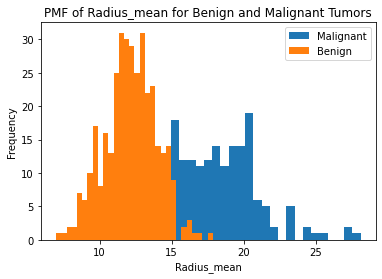

Most frequent malignant radius mean is:  20.101999999999997


In [32]:
#PMF of Radius_mean for Benign and Malignant Tumors
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30,label = "Benign")
plt.legend()
plt.xlabel("Radius_mean")
plt.ylabel("Frequency")
plt.title("PMF of Radius_mean for Benign and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

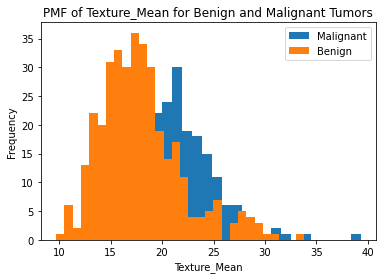

Most frequent malignant texture mean is:  20.976666666666667


In [33]:
#PMF of Texture_Mean for Benign and Malignant Tumors
m1 = plt.hist(df[df["diagnosis"] == "M"].texture_mean,bins=30,label = "Malignant")
b1 = plt.hist(df[df["diagnosis"] == "B"].texture_mean,bins=30,label = "Benign")
plt.legend()
plt.xlabel("Texture_Mean")
plt.ylabel("Frequency")
plt.title("PMF of Texture_Mean for Benign and Malignant Tumors")
plt.show()
frequent_malignant_texture_mean = m1[0].max()
index_frequent_malignant_texture_mean = list(m1[0]).index(frequent_malignant_texture_mean)
most_frequent_malignant_texture_mean = m1[1][index_frequent_malignant_texture_mean]
print("Most frequent malignant texture mean is: ",most_frequent_malignant_texture_mean)

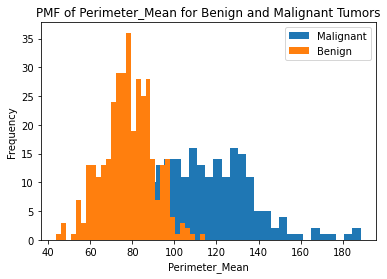

Most frequent malignant perimeter mean is:  106.88


In [34]:
# PMF of Perimeter_Mean for Benign and Malignant Tumors
m2 = plt.hist(df[df["diagnosis"] == "M"].perimeter_mean,bins=30,label = "Malignant")
b2 = plt.hist(df[df["diagnosis"] == "B"].perimeter_mean,bins=30,label = "Benign")
plt.legend()
plt.xlabel("Perimeter_Mean")
plt.ylabel("Frequency")
plt.title("PMF of Perimeter_Mean for Benign and Malignant Tumors")
plt.show()
frequent_malignant_perimeter_mean = m2[0].max()
index_frequent_malignant_perimeter_mean = list(m2[0]).index(frequent_malignant_perimeter_mean)
most_frequent_malignant_perimeter_mean = m2[1][index_frequent_malignant_perimeter_mean]
print("Most frequent malignant perimeter mean is: ",most_frequent_malignant_perimeter_mean)

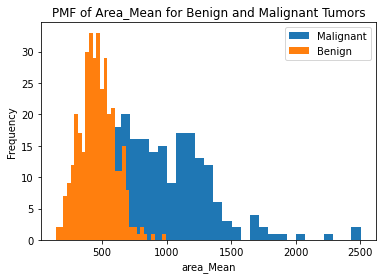

Most frequent malignant Area_Mean is:  646.8533333333334


In [35]:
#PMF of Area_Mean for Benign and Malignant Tumors
m3 = plt.hist(df[df["diagnosis"] == "M"].area_mean,bins=30,label = "Malignant")
b3 = plt.hist(df[df["diagnosis"] == "B"].area_mean,bins=30,label = "Benign")
plt.legend()
plt.xlabel("area_Mean")
plt.ylabel("Frequency")
plt.title("PMF of Area_Mean for Benign and Malignant Tumors")
plt.show()
frequent_malignant_area_mean = m3[0].max()
index_frequent_malignant_area_mean = list(m3[0]).index(frequent_malignant_area_mean)
most_frequent_malignant_area_mean = m3[1][index_frequent_malignant_area_mean]
print("Most frequent malignant Area_Mean is: ",most_frequent_malignant_area_mean)

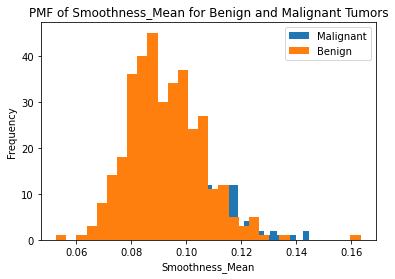

Most frequent malignant Smoothness mean is:  0.09737333333333333


In [36]:
#PMF of Smoothness_Mean for Benign and Malignant Tumors
m4 = plt.hist(df[df["diagnosis"] == "M"].smoothness_mean,bins=30,label = "Malignant")
b4 = plt.hist(df[df["diagnosis"] == "B"].smoothness_mean,bins=30,label = "Benign")
plt.legend()
plt.xlabel("Smoothness_Mean")
plt.ylabel("Frequency")
plt.title("PMF of Smoothness_Mean for Benign and Malignant Tumors")
plt.show()
frequent_malignant_smoothness_mean = m4[0].max()
index_frequent_malignant_smoothness_mean = list(m4[0]).index(frequent_malignant_smoothness_mean)
most_frequent_malignant_smoothness_mean = m4[1][index_frequent_malignant_smoothness_mean]
print("Most frequent malignant Smoothness mean is: ",most_frequent_malignant_smoothness_mean)

### Cumulative Distribution Functions

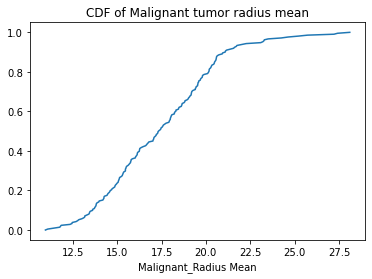

In [37]:
data =df_malignant.radius_mean
# sort the data in ascending order
x = np.sort(data)
# get the cdf values of y
y = np.arange(len(x))/float(len(x)-1)
  
# plotting
plt.xlabel('Malignant_Radius Mean')
plt.title('CDF of Malignant tumor radius mean')
plt.plot(x, y)

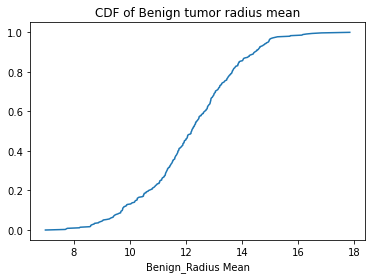

In [38]:
data =df_benign.radius_mean
# sort the data in ascending order
x = np.sort(data)
# get the cdf values of y
y = np.arange(len(x))/float(len(x)-1)
  
# plotting
plt.xlabel('Benign_Radius Mean')
plt.title('CDF of Benign tumor radius mean')
plt.plot(x, y)

### Normal Distribution

mean:  12.133158802183178
standard deviation:  1.7893799785931963


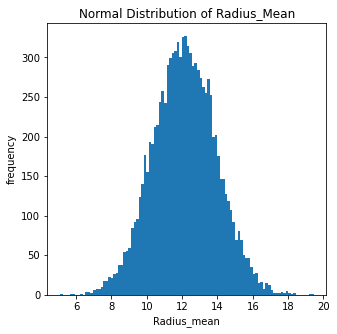

In [39]:
# parameters of normal distribution
mean= 12.146524
std =  1.780512
s = np.random.normal(mean, std, 10000)
print("mean: ", np.mean(s))
print("standard deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (5,5))
plt.hist(s, 100)
plt.ylabel("frequency")
plt.xlabel("Radius_mean")
plt.title("Normal Distribution of Radius_Mean")
plt.show()

### Scatter Plots- Relationship between the variables

<Figure size 720x360 with 0 Axes>

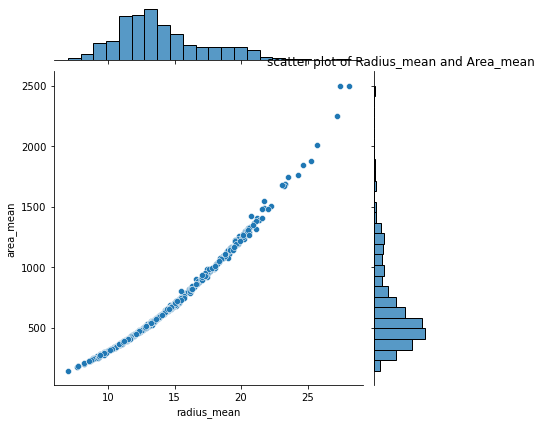

In [40]:
plt.figure(figsize = (10,5))
sns.jointplot(df.radius_mean,df.area_mean,kind="scatter")
plt.title("scatter plot of Radius_mean and Area_mean")
plt.show()

<Figure size 720x360 with 0 Axes>

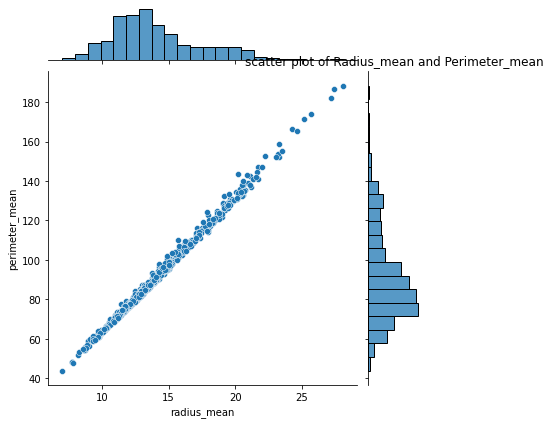

In [41]:
plt.figure(figsize = (10,5))
sns.jointplot(df.radius_mean,df.perimeter_mean,kind="scatter")
plt.title("scatter plot of Radius_mean and Perimeter_mean")
plt.show()

###### Tumor statistics

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

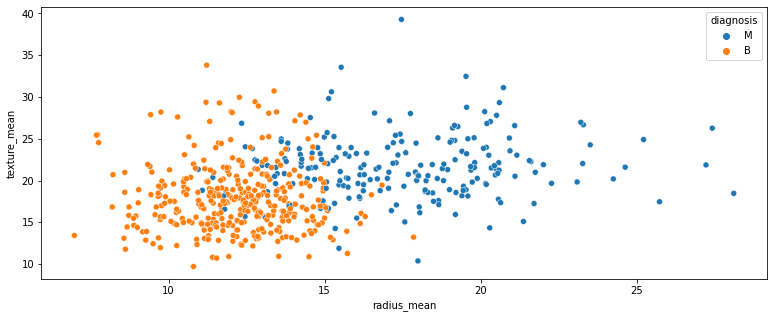

In [42]:
plt.figure(figsize=(13,5))
sns.scatterplot(df['radius_mean'],df['texture_mean'],hue=df['diagnosis'])

<AxesSubplot:xlabel='compactness_mean', ylabel='smoothness_mean'>

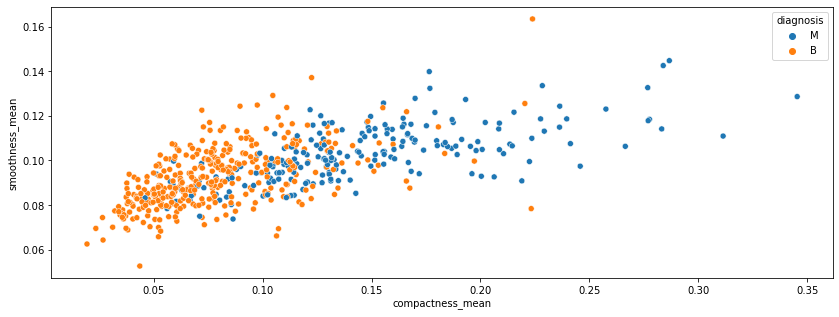

In [43]:
plt.figure(figsize=(14,5),)
sns.scatterplot(df['compactness_mean'],df['smoothness_mean'],hue=df['diagnosis'])

#### Correlation

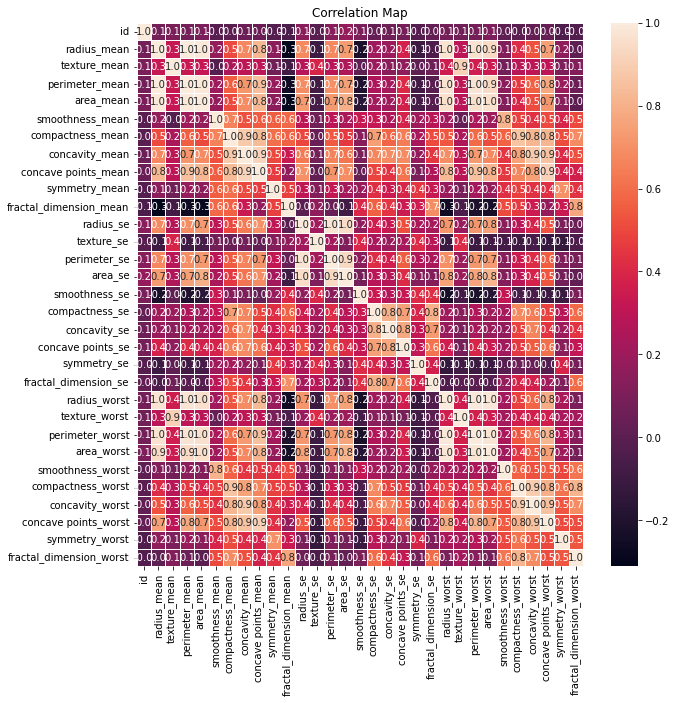

In [44]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('CorrelationMap.png')
plt.show()

#### Covariance

In [45]:
np.cov(df.radius_mean,df.area_mean)
print("Covariance between radius mean and area mean: ",df.radius_mean.cov(df.area_mean))

Covariance between radius mean and area mean:  1224.483409346457


In [46]:
np.cov(df.radius_mean,df.perimeter_mean)
print("Covariance between radius mean and perimeter mean: ",df.radius_mean.cov(df.perimeter_mean))

Covariance between radius mean and perimeter mean:  85.44714165573404


#### Pearson’s correlation

In [47]:
# finding pearson's correlation between radius_mean and area_mean
p1 = df.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = df.radius_mean.cov(df.area_mean)/(df.radius_mean.std()*df.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.9873571700566132


In [48]:
# finding pearson's correlation between radius_mean and perimeter_mean
p1 = df.loc[:,["perimeter_mean","radius_mean"]].corr(method= "pearson")
p2 = df.radius_mean.cov(df.perimeter_mean)/(df.radius_mean.std()*df.perimeter_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
                perimeter_mean  radius_mean
perimeter_mean        1.000000     0.997855
radius_mean           0.997855     1.000000
Pearson correlation:  0.9978552814938109


#### Non-Linear Relationships

In [49]:
ranked_data = df.rank()
spearman_corr = ranked_data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


### Classical Hypothesis Testing

In [50]:
statistic, p_value = stats.ttest_rel(df.radius_mean,df.area_mean)
print('p-value: ',p_value)

p-value:  1.5253492492559045e-184


### Regression model

In [52]:
#Breaking data in to labels and Features
Labls= df.diagnosis
Features= df.loc[:, ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean')]
Features.head()
Features.shape
Xtrain, Xtest, Ytrain, Ytest= train_test_split(Features, Labls, test_size=0.3, shuffle=True)
Log_Reg=LogisticRegression()
#Training Model
Log_Reg.fit(Xtrain, Ytrain)
#Prediction
Log_Reg.score(Xtrain, Ytrain)

0.9271356783919598

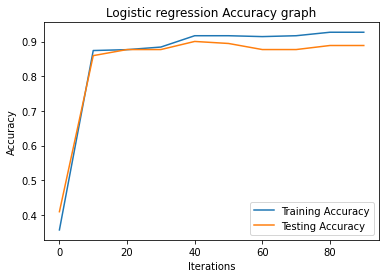

In [53]:
#Loop for taking average result (More accurate)
Array= 10*(np.arange(10))
Test_Score=[]
Train_Score=[]

for i in Array:
    Log_Reg= LogisticRegression(max_iter=i)
    Log_Reg.fit(Xtrain, Ytrain)
    Test_Score.append(Log_Reg.score(Xtest, Ytest))
    Train_Score.append(Log_Reg.score(Xtrain, Ytrain))
    
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Logistic regression Accuracy graph")
plt.plot(Array, Train_Score, label= 'Training Accuracy')
plt.plot(Array, Test_Score, label= 'Testing Accuracy')
plt.legend()